In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [2]:
# Read in CSV files as dataframes
gdp_and_health_df = pd.read_csv('Resources/gdp_health_per_cap.csv')
historical_health_df = pd.read_csv('Resources/historical_health_percent.csv')

In [3]:
# Clean the DataFrame
gdp_health_clean = gdp_and_health_df.dropna(how='any')
gdp_health_clean.head(1)

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473


In [4]:
gdp_health_clean.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]'],
      dtype='object')

In [5]:
# Removing unwanted columns
gdp_health_reduced = gdp_health_clean[['Time', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]']]

gdp_health_reduced.head(1)

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,Australia,AUS,50192.957328,5337.97600331473


In [6]:
# Rename columns 
gdp_health_df = gdp_health_reduced.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (current international $)' , 
                                                   'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]' : 'Current health expenditure per capita, PPP (current international $)'})

# New DataFrame of most recent year with data available* 
#   (2021 has several countries with missing info)
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']

#gdp_health_df_2020
pd.unique(gdp_and_health_df['Country Name'])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States', 'Brazil', 'Chile', 'China',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russian Federation',
       'Slovenia', 'South Africa', 'Latvia', 'Costa Rica', 'Lithuania',
       'Colombia', 'Peru', 'Bulgaria', 'Croatia', 'Romania', 'Argentina',
       'Malta', 'Cyprus', nan], dtype=object)

In [7]:
# Re-cast series as float type
gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_16272\963506661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
C:\Users\chris\AppData\Local\Temp\ipykernel_16272\963506661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expend

In [8]:
# New Data Frame without USA data to obtain comparable country average 
all_but_us = gdp_health_df.loc[gdp_health_df['Country Name']!= "United States",:]

In [9]:
# New DataFrame for 2022 year data
gdp_health_df_2022 = gdp_health_df.loc[gdp_health_df['Time']== '2022']
#gdp_health_df_2022

In [10]:
# New DataFrame with most recent year data for Health expenditure per capita without USA
all_but_us_2020 = all_but_us.loc[all_but_us['Time']== '2020'] 
#all_but_us_2020

# New Data Frame with most recent year data for GDP per capita, PPP (current international $)
all_but_us_2022 =all_but_us.loc[all_but_us['Time']== '2022'] 
#all_but_us_2022

In [11]:
# Cast health expenditure coulmn as float for mean calculation
all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_16272\662946502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_but_us_2020["Current health expenditure per capita, PPP (current international $)"] = all_but_us_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')


In [12]:
# Cleaning/filtering dataframe to gdp data
gdp_data = gdp_health_df[['Time', 'Country Name', 'GDP per capita, PPP (current international $)']]
#gdp_data

gdp_data = gdp_data.rename(columns={'Time' : 'Year', 'Country Name' : 'Country'})

#gdp_data.head(1)

# Filter and create new dataframes for 2020 and 2022 years
gdp_data_2020 = gdp_data.loc[gdp_data['Year'] == '2020']
gdp_data_2022 = gdp_data.loc[gdp_data['Year'] == '2022']
gdp_data_2020.head()

,Year,Country,"GDP per capita, PPP (current international $)"
102,2020,Australia,53066.490989
103,2020,Austria,57258.690227
104,2020,Belgium,54569.925385
105,2020,Canada,47226.365140
106,2020,Czechia,42827.060006


In [13]:
# Reduce 2020 and 2022 GDP per capita dataframes
gdp_data_2020 = gdp_data_2020[['Country', 'GDP per capita, PPP (current international $)']]
gdp_data_2022 = gdp_data_2022[['Country', 'GDP per capita, PPP (current international $)']]

In [14]:
# Calculate average of GDP per Capita for 2020
gdp_avg_2020 = all_but_us_2020["GDP per capita, PPP (current international $)"].mean()
#gdp_avg_2020 

# Calculate average of GDP per Capita for 2022
gdp_avg_2022 = all_but_us_2022["GDP per capita, PPP (current international $)"].mean()
#gdp_avg_2022 

In [15]:
# Add 2020 GDP average to dataframe
new_index_gdp_2020 = gdp_data_2020.index.max() +1
gdp_data_2020.loc[new_index_gdp_2020] = ['Comparable Country Avg', gdp_avg_2020]

#gdp_data_2022

In [16]:
# Add 2022 GDP average to dataframe
new_index_gdp_2022 = gdp_data_2022.index.max() +1
gdp_data_2022.loc[new_index_gdp_2022] = ['Comparable Country Avg', gdp_avg_2022]

C:\Users\chris\AppData\Local\Temp\ipykernel_16272\918104662.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gdp_data_2020['Country'], rotation=90)


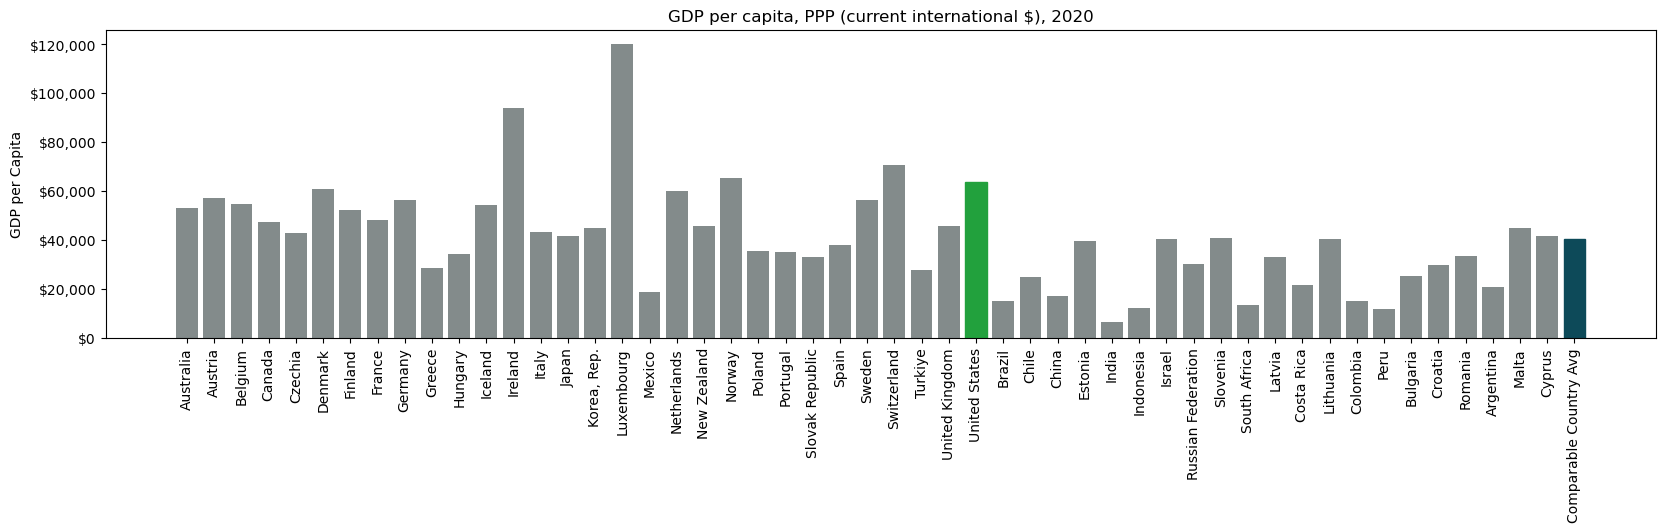

In [17]:
# Plot 2020 GDP per Capita data
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(gdp_data_2020['Country'], gdp_data_2020['GDP per capita, PPP (current international $)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[51].set_color("#0d4a59")
ax1.set_xticklabels(gdp_data_2020['Country'], rotation=90)
ax1.set_title('GDP per capita, PPP (current international $), 2020')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("${x:,.0f}")

C:\Users\chris\AppData\Local\Temp\ipykernel_16272\3803313260.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gdp_data_2022['Country'], rotation=90)


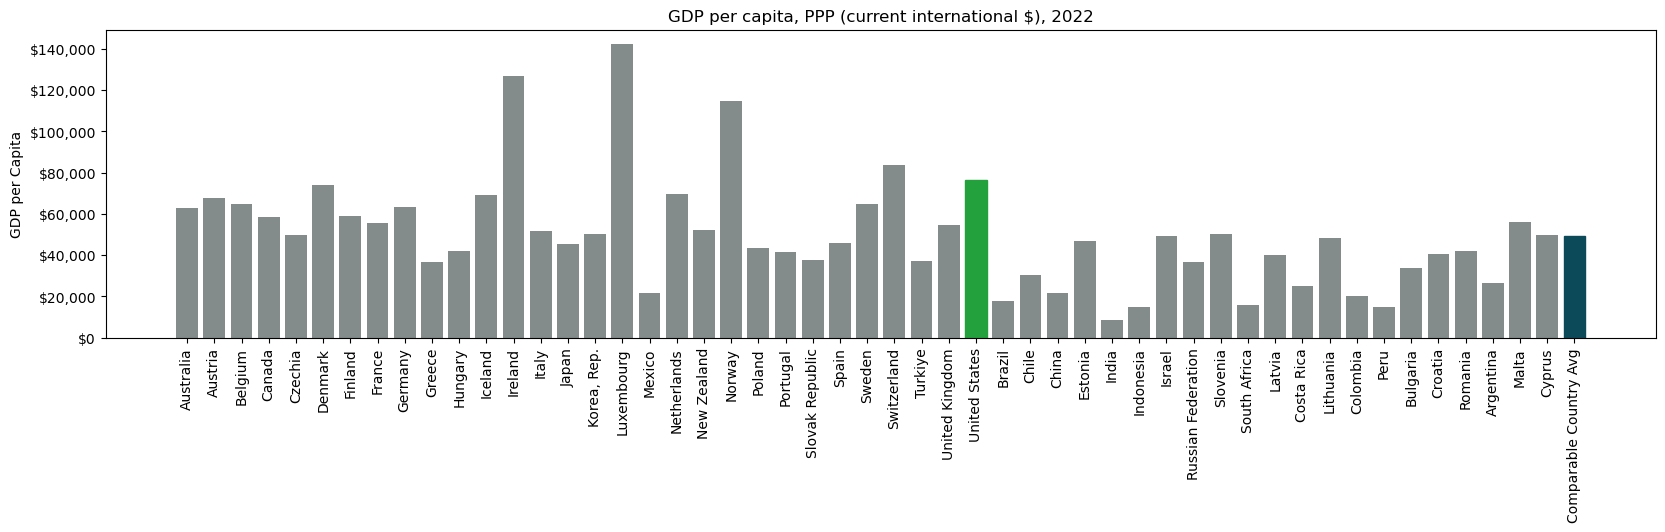

In [18]:
# Plot 2022 GDP per Capita data
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

ret = ax1.bar(gdp_data_2022['Country'], gdp_data_2022['GDP per capita, PPP (current international $)'], color='#838b8b')
ret[29].set_color('#22a13d')
ret[51].set_color("#0d4a59")
ax1.set_xticklabels(gdp_data_2022['Country'], rotation=90)
ax1.set_title('GDP per capita, PPP (current international $), 2022')
ax1.set_ylabel('GDP per Capita')
ax1.yaxis.set_major_formatter("${x:,.0f}")

In [19]:
# Merge 2020 GDP and 2022 GDP data
gdp_2020_2022 = pd.merge(gdp_data_2020, gdp_data_2022, on='Country')

# Rename columns for better understanding
gdp_2020_2022 = gdp_2020_2022.rename(columns={'GDP per capita, PPP (current international $)_x' : 'GDP per capita 2020',
                                             'GDP per capita, PPP (current international $)_y' : 'GDP per capita 2022' })

gdp_2020_2022.head(1)

,Country,GDP per capita 2020,GDP per capita 2022
0,Australia,53066.490989,62625.357642


Text(0, 0.5, 'GDP per capita')

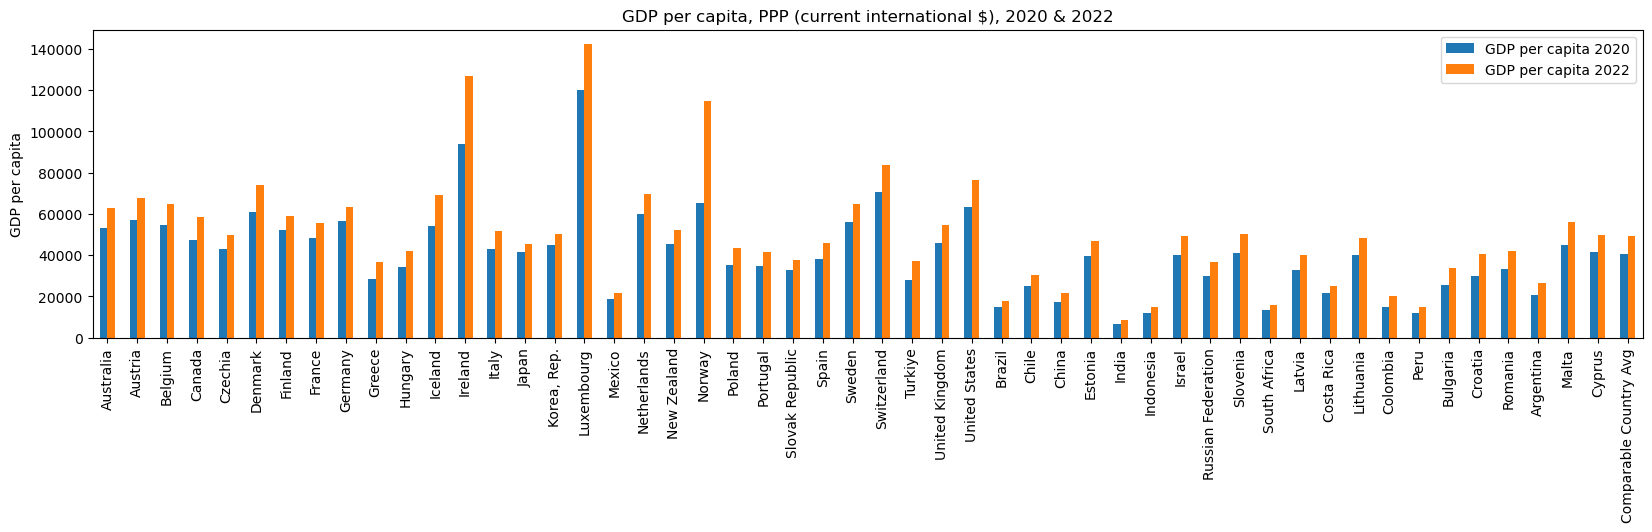

In [20]:
# Plot multi bar graph of 2020 GDP and 2022 GDP data
multi_plot_gdp = gdp_2020_2022.plot(kind='bar', figsize=(20,4))
multi_plot_gdp.set_xticklabels(gdp_2020_2022["Country"], rotation=90)
plt.title('GDP per capita, PPP (current international $), 2020 & 2022')
plt.ylabel('GDP per capita')